### Testing the ```utils.Filehandling.FileHandlingInterface``` module

In [37]:
from src.lib.utils.FileHandling.FileHandlingInterface import *
from src.lib.probabilityEstim.Likelihood import *
import matplotlib.pyplot as plt
import logging
import time
import warnings

In [38]:
numba_logger = logging.getLogger('numba')
numba_logger.setLevel(logging.DEBUG)
warnings.simplefilter("always", RuntimeWarning)

In [39]:
PASCAL_DEMO_IMAGE_PATH = r"src\data\demoPascal\2008_003147.jpg"
PASCAL_DEMO_IMAGE_PATH1 = r"src\data\demoPascal\2010_005258.jpg"

In [70]:
sample_image = TargetImage(
    PASCAL_DEMO_IMAGE_PATH1             
)

In [71]:
image_array = sample_image.get_image_array()

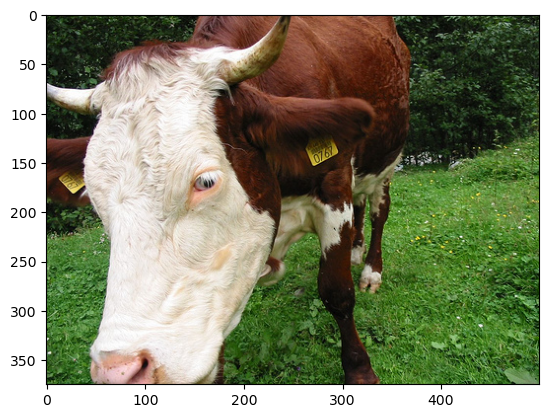

In [72]:
plt.imshow(image_array.transpose((2, 1, 0)))

In [73]:
PASCAL_DEMO_SCRIBBLE_PATH = r"src\data\demoPascal\2008_003147.xml"
PASCAL_DEMO_SCRIBBLE_PATH1 = r"src\data\demoPascal\2010_005258.xml"

In [74]:
sample_scribble = EncodedScribble(
    PASCAL_DEMO_SCRIBBLE_PATH1
)

debug values: 

*    0 -> No debugging (Default)
*    1 -> Spatial Kernel
*    2 -> Chromatic Kernel
*    3 -> Spatial Kernel Exponent Argument
*    4 -> Chromatic Kernel Exponent Argument
*    5 -> Spatial Kernel Normalization Term 
*    7 -> Spatial Kernel Width

In [75]:
n_classes = sample_scribble.get_n_classes()

In [76]:
likelihood = Likelihood(
    n_classes,  
    return_ = 0,
    #alpha = 13, 
    #sigma = 18
)

Normalized Kernel

In [77]:
time0 = time.time()
fitted_likelihood = likelihood.fit(
    sample_image, 
    sample_scribble,
    normalize = True,
    neg_log = True
)
print(f"{time.time() - time0}")

dtype float64
1.230985164642334


c:\Users\lollo\Desktop\GM\T2_DSBA_Graphical_Methods\src\lib\probabilityEstim\Likelihood.py:162: RuntimeWarning: invalid value encountered in divide
  kde_likelihood_map /= np.sum(kde_likelihood_map, axis = 0) # normalize to sum to one over each class


In [48]:
time0 = time.time()
fitted_likelihood1 = likelihood.fit(
    sample_image,
    sample_scribble,
    normalize = False,
    neg_log = False
)
print(f"{time.time() - time0}")

dtype float64
1.2352771759033203


In [49]:
likelihood = Likelihood(
    n_classes,  
    return_ = 2,
    #alpha = 13, 
    #sigma = 18
)

In [50]:
time0 = time.time()
fitted_likelihood_chromo = likelihood.fit(
    sample_image, 
    sample_scribble,
    normalize = True,
    neg_log = False
)
print(f"{time.time() - time0}")

dtype float64
1.4665217399597168


In [51]:
nan_chromo = np.argwhere(np.isnan(fitted_likelihood_chromo))
nan_chromo

array([], shape=(0, 3), dtype=int64)

In [52]:
likelihood = Likelihood(
    n_classes,  
    return_ = 1,
    #alpha = 0.13, 
    #sigma = 18
)

In [53]:
time0 = time.time()
fitted_likelihood_spatial = likelihood.fit(
    sample_image, 
    sample_scribble,
    normalize = False,
    neg_log = False
)
print(f"{time.time() - time0}")

dtype float64
1.240107774734497


In [64]:
nan_spatial = np.argwhere(np.isnan(fitted_likelihood))
nan_spatial

array([], shape=(0, 3), dtype=int64)

spatial kernel width

In [55]:
likelihood = Likelihood(
    n_classes,  
    return_ = 7,
    ##alpha = 0.13, 
    #sigma = 18
)

In [56]:
time0 = time.time()
fitted_likelihood_width = likelihood.fit(
    sample_image, 
    sample_scribble,
    normalize = False,
    neg_log = False
)
print(f"{time.time() - time0}")

dtype float64
1.0917370319366455


Plotting

In [78]:
likelihood_to_plot = fitted_likelihood

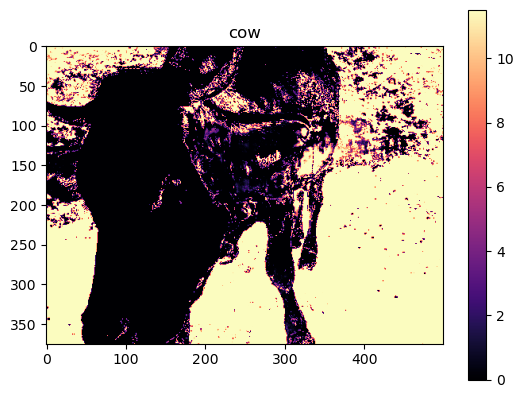

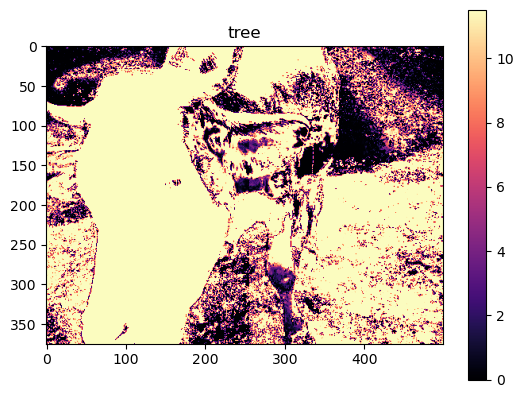

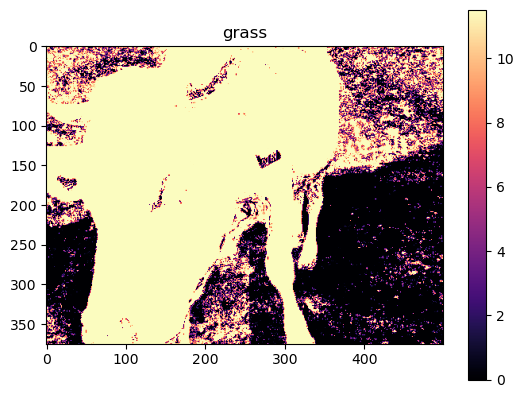

In [81]:
classes = list(sample_scribble.get_scribble_dictionary().keys())
for dim in range(likelihood_to_plot.shape[0]):
    # Create a new figure and axis for each plot
    fig, ax = plt.subplots()
    
    vmin = np.min(likelihood_to_plot[dim])
    vmax = np.max(likelihood_to_plot[dim])
    im1 = ax.imshow(likelihood_to_plot[dim].transpose((1, 0)), cmap='magma', alpha=1.0, vmin=vmin, vmax=vmax)
    
    # Add a title and colorbar legend to the plot
    ax.set_title(classes[dim]) 
    fig.colorbar(im1, ax=ax, label='')
    
    # Plot the image array on the same axis
    #im2 = ax.imshow(image_array.transpose((2, 1, 0)), alpha=0.3)
    
    
    # Save the plot as a PNG image file
    fig.savefig(f'plots/2010/factorised_likelihood_plot_{classes[dim]}.png', dpi=300)
    # Show the plot
    plt.show()

In [59]:
np.argwhere(np.isnan(fitted_likelihood))

array([], shape=(0, 3), dtype=int64)

analysing a known scribble point

In [60]:
a0 = fitted_likelihood[0, :, :]
a1 = fitted_likelihood[1, :, :]
a2 = fitted_likelihood[2, :, :]
asum = np.sum(fitted_likelihood, axis = 0)

np.unravel_index(np.argmin(a0, keepdims=1), a0.shape)

x = 5
y = 5
b0 = a0[77 - y: 77 + y, 363 - x: 363 + x]
b1 = a1[77 - y: 77 + y, 363 - x: 363 + x]
b2 = a2[77 - y: 77 + y, 363 - x: 363 + x]
bs = asum[77 - y: 77 + y, 363 - x: 363 + x]
ia = image_array[: , 77 - y: 77 + y, 363 - x: 363 + x]


In [61]:
assert len(np.argwhere(np.isnan(b0))) == len(np.argwhere(np.isnan(b1))) and len(np.argwhere(np.isnan(b0))) == len(np.argwhere(np.isnan(b2)))
for idx in range(len(np.argwhere(np.isnan(b0)))):
    x0, y0 = np.argwhere(np.isnan(b0))[idx]
    x1, y1 = np.argwhere(np.isnan(b1))[idx]
    x2, y2 = np.argwhere(np.isnan(b0))[idx]
    assert x0 == x1 and x1 == x2
    assert y0 == y1 and y1 == y2


nan_likelihood = np.argwhere(np.isnan(fitted_likelihood))

for c, w, h in nan_likelihood:
    assert not fitted_likelihood1[c, w, h]